In [1]:
%matplotlib inline

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import sympy as sp
from sympy import lambdify
from sympy.functions import *

In [3]:
# A function that will later help us plot functions

def plot_funcs(funcs, *args, ylims = [None, None], start_x = -4, end_x = 4, points_quantity = 2000, labels = [], colors = ['blue'], equal_aspect = True):
    
    for missing_clr in range(len(funcs) - len(colors)):
        colors.append(colors[-1])
    # makes sure that all functions are plotted even if the list of colors is longer
    # (the latter functions will be plotted using the last color in the colors list)
    
    for missing_label in range(len(funcs) - len(labels)):
        labels.append(None)
    #makes sure that the function works properly if there are less labels than functions
    
    def _plot_func(f, color, label):
        x = np.linspace(start_x, end_x, points_quantity)
        vectorized_func = np.vectorize(f)
        y = vectorized_func(x)
        plt.plot(x,y, color = color, label = label)
        
    for func, clr, label in zip(funcs, colors, labels):
        _plot_func(func, clr, label)
    
    plt.xlim(start_x, end_x)
    plt.ylim(*ylims)
    if(equal_aspect):
        plt.gca().set_aspect('equal')
    if(labels[0] != None): # gives you the legend of the plot only if there are labels to show
        plt.legend()
    plt.show()

# Taylor Series

## Introduction

### What is the purpose of function approximations?

Some functions in mathematics require a large amount of computational resources. Such are trigonometric, exponential and logarithmic functions because they include the use of constants like $e$ and $\pi$. It is just the nature of some numbers, they are uninformative and unstructured, which leads to the calculating of the exact value of a function sometimes being extremely laborious if not outright impossible.  That is where function approximations come in. They are much easier functions to work out, which generalise the output of the orginial function. It is important to note though, the function approximations are in fact approximations and they will not return the 100% true value of the initial function but rather something close to it.

### What are some easy ways to approximate a function near a given point?

Ok, let's take the function $f(x)=\cos(x)$, and approximate it for $x=0$ using the simpliest polynomial, just a constant, $p(x)=c_0$.

Well, since $f(0)=1$, $p(0)$ should also equal 1, which means $c_0=1$ and ... There we have it! Our approximation is complete - $p(x)=1$. Lets plot both of the functions and see the results:

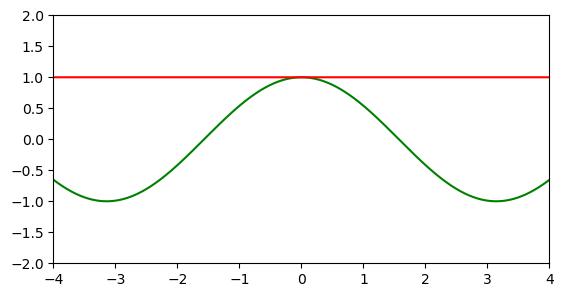

In [4]:
f = np.cos
p = lambda x: 1

plot_funcs([f, p],
           colors = ['green', 'red'],
           ylims = [-2, 2])

Unfortunately, we are not quite there yet, but we can see that the approximation for $x=0$ is correct and there is a resemblence of the actual function in the values around it.

### Why polynomials?

They are the next best thing to simple arithmetic operations, in fact they are just a sequence of simple arithmetic operations, nothing more, nothing less. As I have mentioned before, computing trigonometric functions for example is a lot harder. It is also easier to differentiate a polynomial and they are also easier to integrate. That is why we prefer polynomials :)

### What information does the first derivative of a function give us?

"The derivative shows the sensitivity of change of a function's output at a certain point" - [Wikipedia](https://en.wikipedia.org/wiki/Derivative)

Sure, but how can the derivative be beneficial to us. It can help us a whole lot actually, because if we make it so the slope of the function we are trying to approximate and the slope of the approximation match, then our approximation will be more precise. Let's try to approximate some function, we will take $g(x)=e^x$ for this example, with a two-term polynomial this time - $h_2(x)=c_0 + c_1x$ and compare it with a one-term polynomial approximation $h_1(x)=c_0$:

$$g(0)=1\implies c_0=1$$
$$g^\prime(x)=e^x$$
$$h^{\prime}_2(x)=c1$$
$$g^\prime(0)=1\implies h^{\prime}_2(0)=1\implies c_1=1$$

Ok, to summerise we have the functions:
$$g(x)=e^x$$
$$h_1(x)=1$$
$$h_2(x)=1+x$$

Let's plot them and see what is happening:

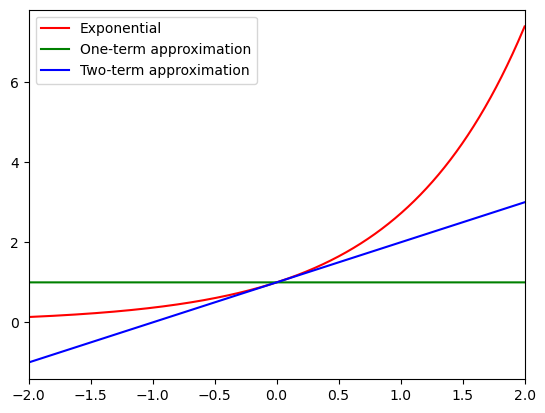

In [5]:
g = np.exp
h1 = lambda x: 1
h2 = lambda x: 1 + x

plot_funcs([g, h1, h2],
           colors = ['red', 'green', 'blue'],
           labels = ['Exponential', 'One-term approximation', 'Two-term approximation'],
           equal_aspect = False,
           start_x = -2, end_x = 2)

Now we can see that the approximations we are making are not just straight lines but are in fact getting closer to the actual value:

In [6]:
print(f'h1(0.3) = {h1(0.3):0.6f}')
print(f'h2(0.3) = {h2(0.3):0.6f}')
print(f'g(0.3) = {g(0.3):0.6f}')

h1(0.3) = 1.000000
h2(0.3) = 1.300000
g(0.3) = 1.349859


Still, we have got room for improvement. But how can we improve? The answer is simple - just do this process all over again but this time make sure the second derivatives of the function and the approximation match.

## The Essence of Taylor Series

### Taylor series for $\cos(x)$

Ok, we shall play out the evaluation of the approximation of $\cos(x)$. Let's say we have the function $p(x)=c_0+c_1x+c_2x^2+c_3x^3+c_4x^4$. We have already established that $c_0=1$ above.

Now we'll take the derivatives of both functions:
$$f^\prime(x) = -\sin(x)$$
$$p^\prime(x) = c_1+2c_2x+3c_3x^2+4c_4x^3$$
and plug 0 into both:
$$f^\prime(0) = 0$$
$$p^\prime(0) = c_1$$
that means $c_1 = 0$

Now again we take the second derivatives of the functions:
$$f^{\prime\prime}(x) = -\cos(x)$$
$$p^{\prime\prime}(x) =2c_2+6c_3x+12c_4x^2$$
and again plug 0 into both:
$$f^{\prime\prime}(0) = -1$$
$$p^{\prime\prime}(0) = 2c_2$$
therefore $c_2 = -\frac{1}{2}$

If we stop here and disregard the terms left we get the function $p_1(x)=1-\frac{1}{2}x^2$, but if we continue we'll get $p_2(x)=1-\frac{1}{2}x^2+\frac{1}{24}x^4$. Let's plot them and see the difference:

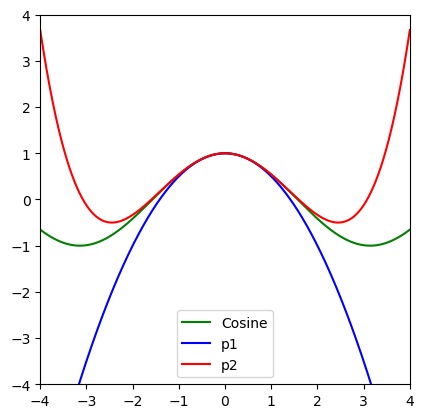

In [7]:
f = np.cos
p1 = lambda x: 1 - x ** 2 / 2
p2 = lambda x: 1 - x ** 2 / 2 + x ** 4 / 24

plot_funcs([f, p1, p2],
           colors = ['green', 'blue', 'red'],
           labels = ['Cosine', 'p1', 'p2'],
           ylims = [-4, 4])

What we created here are 2 Taylor polynomials as they are not the full Taylor series for the function $\cos(x)$ but we can again definitely see that the one with more terms is closer to the true value of the function. If we were to add more terms, we would get even closer but the tradeoff being that the polynomial would become more complex.

In [8]:
print(f'p1(0.3) = {p1(0.3):0.6f}')
print(f'p2(0.3) = {p2(0.3):0.6f}')
print(f'f(0.3) = {f(0.3):0.6f}')

p1(0.3) = 0.955000
p2(0.3) = 0.955337
f(0.3) = 0.955336


Now there are 2 things you should pick up on:
1. Factorials. Because of the repeated use of the power rule, factorials come naturally before calculating a coefficient.
2. Each derivative determines exactly one coefficient and does not interfere with the others, because, at the time of calculating the value of any derivative, higher order terms become 0 (since x-a = 0).

So far we have only been approximating near $x=0$. This is what is called a Maclaurin series, where $a$, the point around which we approximate, is equal to 0. If we want to approximate around another $a$, we would use a Taylor series, where each monomial would look like this - $c_n(x-a)^n$.

Ok, so taking into account this and the 2 points above, we can first derive the formula for each coefficient:
$$f^{(n)}(a)=c_nn!$$
$$c_n = \frac{f^{(n)}(a)}{n!}$$
And since what the Taylor series actually is the sum of infinitely many terms like $c_n(x-a)^n$, we can derive the formula for the Taylor series of the function $f$:
$$f(x)=\sum_{n=0}^{\infty} \frac{f^{(n)}(a)}{n!}(x-a)^n$$

### Taylor Series

Using the formula right above this subheading, we can create a function that calcululates the Taylor expansions so we do not have to:

In [9]:
def taylor_expansion(f, max_n = 4, a = 0):
    result = f.subs(x, a)
    
    for i in range(1, max_n):
        result += sp.diff(f, x, i).subs(x, a)*(x - a)**i / factorial(i)
        
    return result

Now we can have some fun with it!

In [10]:
sp.init_printing()
x = sp.symbols('x')

Let's see the ten-term approximations of the functions we have already approximated ($e^x$ and $\cos(x)$):

In [11]:
taylor_expansion(exp(x), 10)

In [12]:
taylor_expansion(cos(x), 10)

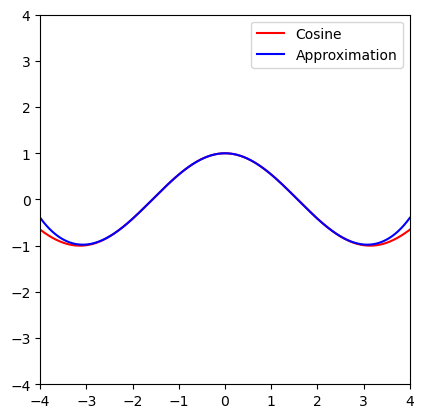

cos(1.4) = 0.169967
approximation(1.4) = 0.169975


In [13]:
f = np.cos
approximation = lambdify(x, taylor_expansion(cos(x), 10))

plot_funcs([f, approximation],
           colors = ['red', 'blue'],
           ylims = [-4, 4],
           labels = ['Cosine', 'Approximation'])

print(f'cos(1.4) = {f(1.4):0.6f}')
print(f'approximation(1.4) = {approximation(1.4):0.6f}')

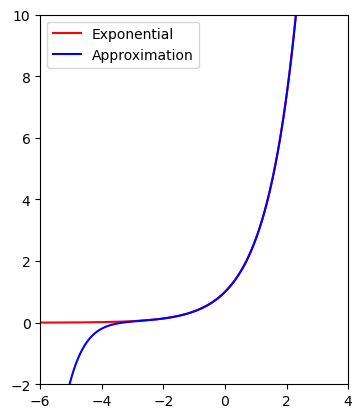

f(1.4) = 4.055200 (f(x) = e^x)
approximation(1.4) = 4.055191


In [14]:
f = np.exp
approximation = lambdify(x, taylor_expansion(exp(x), 10))

plot_funcs([f, approximation],
           colors = ['red', 'blue'],
           ylims = [-2, 10],
           start_x = -6, end_x = 4,
           labels = ['Exponential', 'Approximation'],)

print(f'f(1.4) = {f(1.4):0.6f} (f(x) = e^x)')
print(f'approximation(1.4) = {approximation(1.4):0.6f}')

This again shows that the more terms we add, the more ridiculously close we get. And in theory, if we add infinitely many terms, we would be able to replicate the exact function (sometimes). After all that is what Taylor series is all about.

And just for show let's do an approximation for $\sin(x)$ near $x=3$:

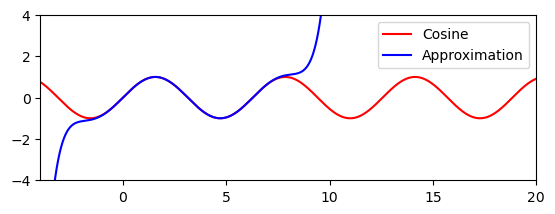

In [15]:
f = np.sin
approximation = lambdify(x, taylor_expansion(sin(x), 12, 3))

plot_funcs([f, approximation],
           colors = ['red', 'blue'],
           ylims = [-4, 4],
           end_x = 20,
           labels = ['Cosine', 'Approximation'])

### Radius of convergence

There is one problem though. On some occasions the Taylor series fails to approximate anything. Let's do some approximations of $\ln(x)$ near $x = 1$:

C:\Users\danip\anaconda3\lib\site-packages\numpy\lib\function_base.py:2201: RuntimeWarning: invalid value encountered in log
  outputs = func(*inputs)
C:\Users\danip\anaconda3\lib\site-packages\numpy\lib\function_base.py:2246: RuntimeWarning: invalid value encountered in log
  outputs = ufunc(*inputs)


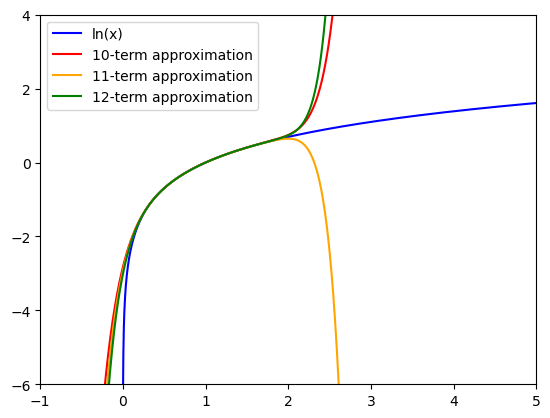

In [16]:
f = np.log
g = lambdify(x, taylor_expansion(log(x), 10, 1))
h = lambdify(x, taylor_expansion(log(x), 11, 1))
t = lambdify(x, taylor_expansion(log(x), 12, 1))

plot_funcs([f, g, h, t],
           colors = ['blue', 'red', 'orange', 'green'],
           labels = ['ln(x)', '10-term approximation', '11-term approximation', '12-term approximation'],
           ylims = [-6, 4],
           start_x = -1, end_x = 5,
           equal_aspect = False)

In this scenario, we see that adding more terms does not help us at all. Our approximation just seems to be uncontrollable after around $x=2$. When that happens we say our polynomial approximation diverges from the original function (otherwise it converges to the original function).

But how can we tell when our approximation will diverge? Simple, we just need to calculate the radius of convergence for our Taylor series. That we can do using the ratio test. Let's assign $L=\lim\limits_{n\to\infty}\left|\frac{a_{n + 1}}{a_n}\right|$ for the sake of simplicity ($a_n$ and $a_{n+1}$ are consecutive terms in the Taylor expansion). The ratio test is as follows:

Our series will converge for all values of $x$ for which $L<1$. If $L>1$, the series will diverge and, if $L=1$ the test is deemed as inconclusive.

OK, so to carry out a ratio test we would need to derive a formula for each term of the Taylor series for $ln(x)$ centered at $x=1$. Let's see what a 10-term approximation looks like:

In [17]:
taylor_expansion(log(x), 10, 1)

Sympy does us a little dirty but if we look closer we can see that each term follows this formula:
$$a_n=\frac{(-1)^{n+1}(x-1)^n}{n}$$

Since we are using absolute values in the ratio test, we can get rid of the $(-1)^{n+1}$ bit. Now let's calculate $L$:
$$L=\lim\limits_{n\to\infty}\left|\frac{a_{n + 1}}{a_n}\right|=$$

$$=\lim\limits_{n\to\infty}\left|\frac{(x-1)^{n+1}}{n+1}\frac{n}{(x-1)^n}\right|=$$

$$=\lim\limits_{n\to\infty}\left|\frac{n(x-1)}{n+1}\right|$$

Now we will need to use L'Hôpital's rule and take the derivatives of both the numerator and the denominator:

$$L=\lim\limits_{n\to\infty}\left|\frac{x-1}{1}\right|$$

$$L=\left|x-1\right|$$

Knowing that for our Taylor series to converge $L$ must be less than 1, then we can say that our series for $\ln(x)$ centered at 1 will converge only for $x\in(0;2)$ no matter how many terms we add. Let's visualize it:

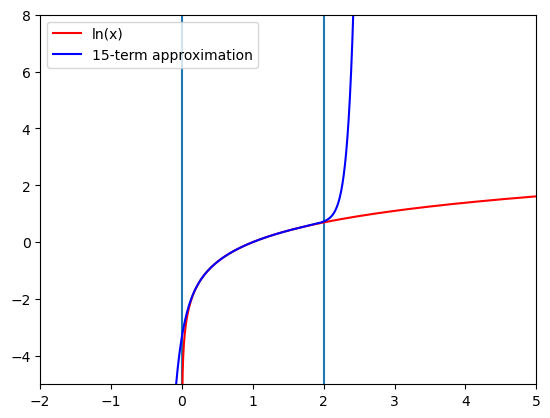

In [18]:
q = lambdify(x, taylor_expansion(log(x), 16, 1))

plt.vlines(2, -5, 8)
plt.vlines(0, -5, 8)
plot_funcs([f, q],
           colors = ['red', 'blue'],
           labels = ['ln(x)', '15-term approximation'],
           start_x = -2, end_x = 5,
           ylims = [-5, 8],
           equal_aspect = False)

## Sources / Credits

- [3blue1brown](https://www.youtube.com/watch?v=3d6DsjIBzJ4)
- [Christina Knudson](https://www.youtube.com/watch?v=l2uUn6PSYvg)
- [Coders Legacy](https://www.youtube.com/watch?v=4GtbHRToFnI&t=505s)
- [Khan Academy](https://www.khanacademy.org/math/ap-calculus-bc/bc-series-new/bc-10-8/v/ratio-test-convergence)